In [50]:
import pandas as pd
import numpy as np

In [51]:
#df = pd.read_excel(f'lexicons/sources/inquirerbasic.xls', false_values=None)

## Set Up

In [1]:
data_in = './data_in'
data_out = './data_out'
data_prefix = 'novels'

In [53]:
novels_csv =  'TOKENS.csv'
OHCO = ['president', 'speech_id', 'para_num', 'sent_num', 'token_num']
SENTS = OHCO[2:5]
PARAS = OHCO[2:4]
CHAPS = OHCO[2:3] # Speeches
BOOKS = OHCO[:1] # Presidents

In [54]:
BAG = CHAPS

In [55]:
#trump = ('stoker','trump')
#hclinton = ('austen','northangerabbey')

In [56]:
salex_csv = f'{data_in}/lexicons/salex_nrc.csv'
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
emo = 'polarity'

## Import

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML

In [58]:
sns.set()
# sns.set_style('whitegrid')

## Get Lexicon

In [59]:
salex = pd.read_csv(salex_csv).set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]

In [60]:
salex['polarity'] = salex.positive - salex.negative

In [61]:
salex

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,polarity
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


## Get lexicon columns

In [62]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

In [63]:
emo_cols 

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'polarity']

## Get Novels

In [64]:
pd.read_csv("LIB.csv")

,Unnamed: 0,speech_id,president,speech_title,src_file
0,0,HClinton_2016_07_28,hclinton,Hillary Clinton delivers remarks at the 2016 D...,./Total_Corpus of Presidential Speeches/HClint...
1,1,HClinton_2016_07_29,hclinton,Democratic presidential candidate Hillary Clin...,./Total_Corpus of Presidential Speeches/HClint...
2,2,HClinton_2016_08_01,hclinton,"Hillary Clinton (D), Presidential Candidate, R...",./Total_Corpus of Presidential Speeches/HClint...
3,3,HClinton_2016_08_05,hclinton,Hillary Clinton delivers remarks at the Nation...,./Total_Corpus of Presidential Speeches/HClint...
4,4,HClinton_2016_08_10,hclinton,Hillary Clinton holds a campaign rally in Des ...,./Total_Corpus of Presidential Speeches/HClint...
...,...,...,...,...,...
1075,1075,wilson_speeches_027,wilson - D,Wilson&#8217;s Fourteen Points,./Total_Corpus of Presidential Speeches/wilson...
1076,1076,wilson_speeches_028,wilson - D,Sixth Annual Message,./Total_Corpus of Presidential Speeches/wilson...
1077,1077,wilson_speeches_029,wilson - D,Fifth Annual Message,./Total_Corpus of Presidential Speeches/wilson...
1078,1078,wilson_speeches_030,wilson - D,Seventh Annual Message,./Total_Corpus of Presidential Speeches/wilson...


In [65]:
TOKENS = pd.read_csv("TOKEN.csv").set_index(OHCO).sort_index()
LIB = pd.read_csv("LIB.csv").set_index('speech_id').sort_index()
#TOKENS = TOKENS.join(LIB)
#TOKENS = TOKENS.reset_index().set_index(['author']+OHCO)

In [66]:
TOKENS = TOKENS.join(salex, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [67]:
TOKENS[salex.columns].sample(10)

,,,,,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,polarity
president,speech_id,para_num,sent_num,token_num,,,,,,,,,,,
reagan,reagan_speeches_035,40,14,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
lbjohnson,lbjohnson_speeches_021,14,0,13,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
trump,Trump_2016_11_04_A,8,30,8,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
carter,carter_speeches_001,74,10,12,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
hclinton,HClinton_2016_08_05,9,0,7,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
trump,Trump_2016_07_25,9,59,9,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
harrison,harrison_speeches_000,14,1,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
hayes,hayes_speeches_010,28,2,8,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
fdroosevelt,fdroosevelt_speeches_008,29,1,10,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0


In [68]:
TOKENS[['term_str'] + emo_cols].sample(10)

term_str  \
president   speech_id                para_num sent_num token_num               
fdroosevelt fdroosevelt_speeches_007 24       6        24                  3   
bush        bush_speeches_019        110      7        18                lee   
monroe      monroe_speeches_009      27       3        18                can   
bush        bush_speeches_013        0        10       13         temptation   
trump       Trump_2016_08_17         166      1        6                 get   
kennedy     kennedy_speeches_029     16       3        4                from   
reagan      reagan_speeches_036      78       11       11                 we   
trump       Trump_2016_09_09         3        0        5                trip   
            Trump_2016_11_04_B       3        41       16               also   
reagan      reagan_speeches_011      41       4        2                 the   

                                                                  anger  \
president   speech_id                para_num sent_num token_num          
fdroosevelt fdroosevelt_speeches_007 24       6        24           0.0   
bush        bush_speeches_019        110      7        18           0.0   
monroe      monroe_speeches_009      27       3        18           0.0   
bush        bush_speeches_013        0        10       13           0.0   
trump       Trump_2016_08_17         166      1        6            0.0   
kennedy     kennedy_speeches_029     16       3        4            0.0   
reagan      reagan_speeches_036      78       11       11           0.0   
trump       Trump_2016_09_09         3        0        5            0.0   
            Trump_2016_11_04_B       3        41       16           0.0   
reagan      reagan_speeches_011      41       4        2            0.0   

                                                                  anticipation  \
president   speech_id                para_num sent_num token_num                 
fdroosevelt fdroosevelt_speeches_007 24       6        24                  0.0   
bush        bush_speeches_019        110      7        18                  0.0   
monroe      monroe_speeches_009      27       3        18                  0.0   
bush        bush_speeches_013        0        10       13                  0.0   
trump       Trump_2016_08_17         166      1        6                   0.0   
kennedy     kennedy_speeches_029     16       3        4                   0.0   
reagan      reagan_speeches_036      78       11       11                  0.0   
trump       Trump_2016_09_09         3        0        5                   0.0   
            Trump_2016_11_04_B       3        41       16                  0.0   
reagan      reagan_speeches_011      41       4        2                   0.0   

                                                                  disgust  \
president   speech_id                para_num sent_num token_num            
fdroosevelt fdroosevelt_speeches_007 24       6        24             0.0   
bush        bush_speeches_019        110      7        18             0.0   
monroe      monroe_speeches_009      27       3        18             0.0   
bush        bush_speeches_013        0        10       13             0.0   
trump       Trump_2016_08_17         166      1        6              0.0   
kennedy     kennedy_speeches_029     16       3        4              0.0   
reagan      reagan_speeches_036      78       11       11             0.0   
trump       Trump_2016_09_09         3        0        5              0.0   
            Trump_2016_11_04_B       3        41       16             0.0   
reagan      reagan_speeches_011      41       4        2              0.0   

                                                                  fear  joy  \
president   speech_id                para_num sent_num token_num              
fdroosevelt fdroosevelt_speeches_007 24       6        24          0.0  0.0   
bush        bush_speeches_019        110      7        18  

In [69]:
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [70]:
TOKENS.head()

pos_tuple pos  \
president speech_id          para_num sent_num token_num                        
adams     adams_speeches_001 0        0        0            ('The', 'DT')  DT   
                                               1           ('zeal', 'NN')  NN   
                                               2            ('and', 'CC')  CC   
                                               3          ('ardor', 'NN')  NN   
                                               4             ('of', 'IN')  IN   

                                                         token_str term_str  \
president speech_id          para_num sent_num token_num                      
adams     adams_speeches_001 0        0        0               The      the   
                                               1              zeal     zeal   
                                               2               and      and   
                                               3             ardor    ardor   
                                               4                of       of   

                                                          anger  anticipation  \
president speech_id          para_num sent_num token_num                        
adams     adams_speeches_001 0        0        0            0.0           0.0   
                                               1            0.0           1.0   
                                               2            0.0           0.0   
                                               3            0.0           0.0   
                                               4            0.0           0.0   

                                                          disgust  fear  joy  \
president speech_id          para_num sent_num token_num                       
adams     adams_speeches_001 0        0        0              0.0   0.0  0.0   
                                               1              0.0   0.0  1.0   
                                               2              0.0   0.0  0.0   
                                               3              0.0   0.0  0.0   
                                               4              0.0   0.0  0.0   

                                                          negative  positive  \
president speech_id          para_num sent_num token_num                       
adams     adams_speeches_001 0        0        0               NaN       NaN   
                                               1               0.0       1.0   
                                               2               NaN       NaN   
                                               3               NaN       NaN   
                                               4               NaN       NaN   

                                                          sadness  surprise  \
president speech_id          para_num sent_num token_num                      
adams     adams_speeches_001 0        0        0              0.0       0.0   
                                               1              0.0       1.0   
                                               2              0.0       0.0   
                                               3              0.0       0.0   
                                               4              0.0       0.0   

                                                          trust  polarity  
president speech_id          para_num sent_num token_num                   
adams     adams_speeches_001 0        0        0            0.0       0.0  
                                               1            1.0       1.0  
                                               2            0.0       0.0  
                                               3            0.0       0.0  
                                               4            0.0       0.0

In [71]:
TOKENS.loc['trump']

pos_tuple  pos  \
speech_id        para_num sent_num token_num                            
Trump_2016_07_22 0        0        0          ('<TRUMP:>', 'JJ')   JJ   
                                   1            ('Thank', 'NNP')  NNP   
                                   2              ('you', 'PRP')  PRP   
                                   3              ('very', 'RB')   RB   
                                   4             ('much.', 'VB')   VB   
...                                                          ...  ...   
Trump_2016_11_09 6        11       3                ('to', 'TO')   TO   
                                   4              ('Mike', 'VB')   VB   
                                   5           ('Pence.', 'NNP')  NNP   
                          12       0            ('Thank', 'NNP')  NNP   
                                   1              ('you.', 'NN')   NN   

                                             token_str term_str  anger  \
speech_id        para_num sent_num token_num                             
Trump_2016_07_22 0        0        0          <TRUMP:>    trump    0.0   
                                   1             Thank    thank    0.0   
                                   2               you      you    0.0   
                                   3              very     very    0.0   
                                   4             much.     much    0.0   
...                                                ...      ...    ...   
Trump_2016_11_09 6        11       3                to       to    0.0   
                                   4              Mike     mike    0.0   
                                   5            Pence.    pence    0.0   
                          12       0             Thank    thank    0.0   
                                   1              you.      you    0.0   

                                              anticipation  disgust  fear  \
speech_id        para_num sent_num token_num                                
Trump_2016_07_22 0        0        0                   0.0      0.0   0.0   
                                   1                   0.0      0.0   0.0   
                                   2                   0.0      0.0   0.0   
                                   3                   0.0      0.0   0.0   
                                   4                   0.0      0.0   0.0   
...                                                    ...      ...   ...   
Trump_2016_11_09 6        11       3                   0.0      0.0   0.0   
                                   4                   0.0      0.0   0.0   
                                   5                   0.0      0.0   0.0   
                          12       0                   0.0      0.0   0.0   
                                   1                   0.0      0.0   0.0   

                                              joy  negative  positive  \
speech_id        para_num sent_num token_num                            
Trump_2016_07_22 0        0        0          0.0       NaN       NaN   
                                   1          0.0       NaN       NaN   
                                   2          0.0       NaN       NaN   
                                   3          0.0       NaN       NaN   
                                   4          0.0       NaN       NaN   
...                                           ...       ...       ...   
Trump_2016_11_09 6        11       3          0.0       NaN       NaN   
                                   4          0.0       NaN       NaN   
                                   5          0.0       NaN       NaN   
                          12       0          0.0       NaN       NaN   
                                   1          0.0       NaN       NaN   

                                              sadness  surprise  trust  \
speech_id        para_num sent_num token_num                             
Trump_2016_07_22 0        0        0      

In [72]:
trump = TOKENS.loc['trump'].copy()
hclinton = TOKENS.loc['hclinton'].copy()

<AxesSubplot:>

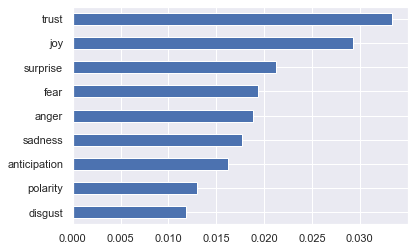

In [73]:
trump[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

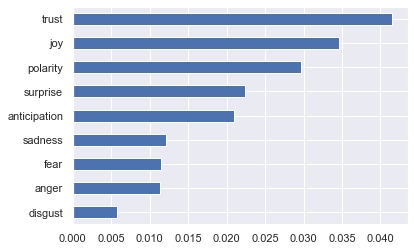

In [74]:
hclinton[emo_cols].mean().sort_values().plot.barh()

## Sentiment by Chapter

In [75]:
OHCO = ['speech_id', 'para_num', 'sent_num', 'token_num']
#CHAPS = OHCO[2:3]
CHAPS = OHCO[:1]
#PARAS = OHCO[2:4]
#PARAS = OHCO[1:2]
SENTS = OHCO[1:2]

In [76]:
OHCO[1:2]

['para_num']

In [77]:
trump_chaps = trump.groupby(CHAPS)[emo_cols].mean()

In [78]:
hclinton_chaps = hclinton.groupby(CHAPS)[emo_cols].mean()

In [79]:
def plot_sentiments(df, emo='polarity'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

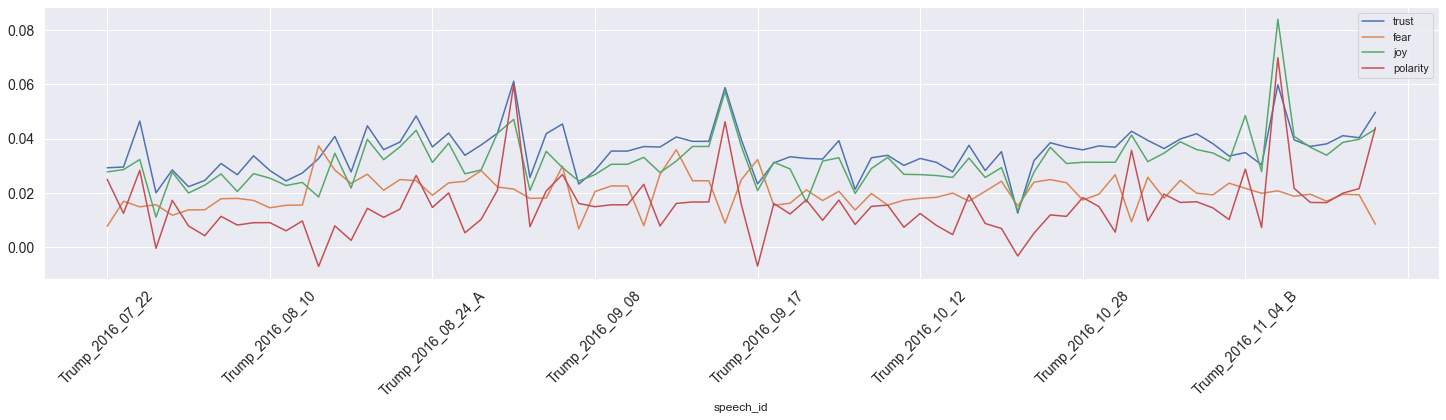

In [80]:
plot_sentiments(trump_chaps, ['trust','fear','joy','polarity'])

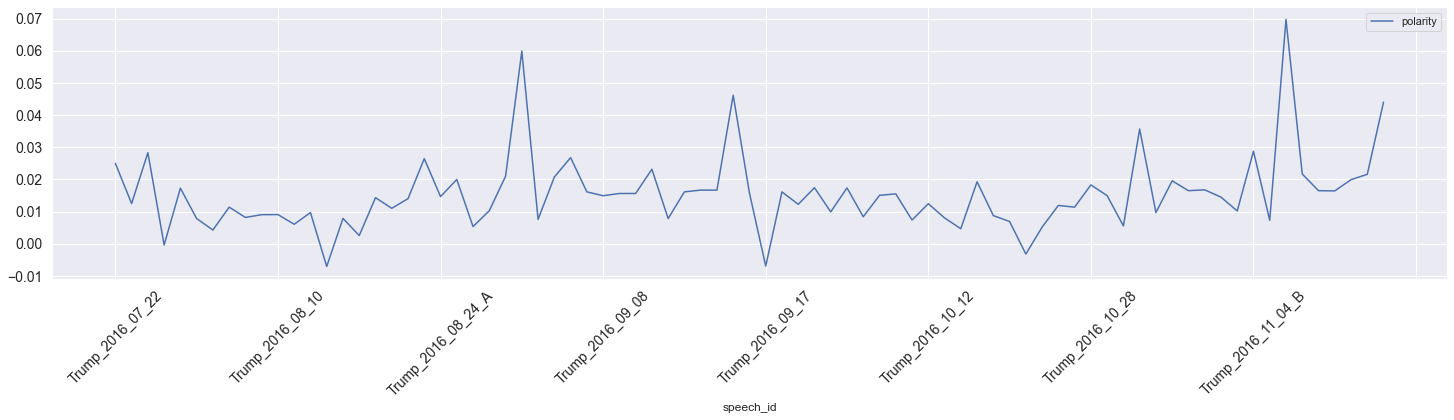

In [81]:
plot_sentiments(trump_chaps, ['polarity'])

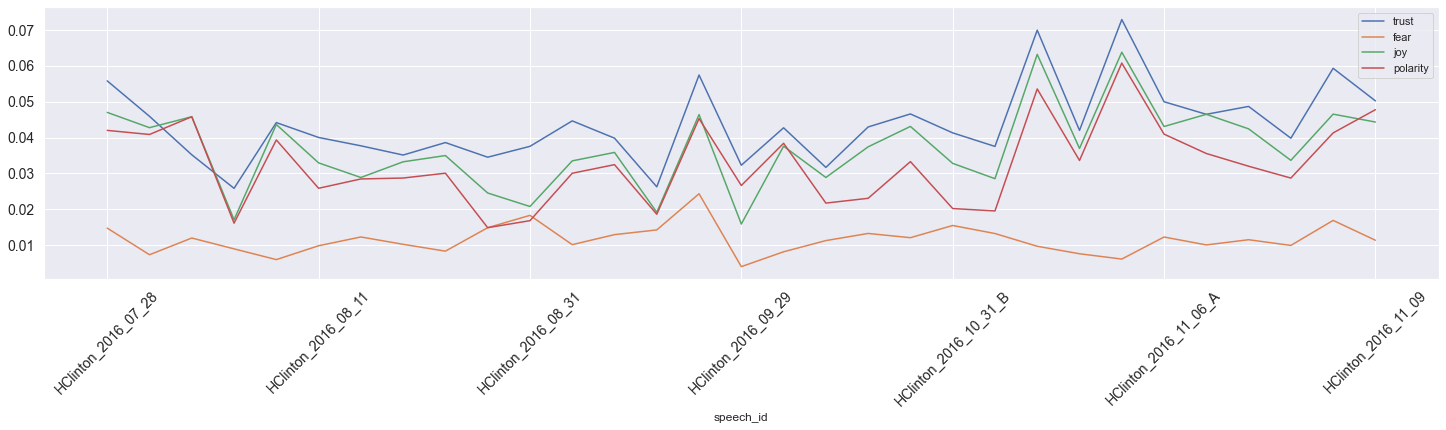

In [82]:
plot_sentiments(hclinton_chaps, ['trust','fear','joy','polarity'])

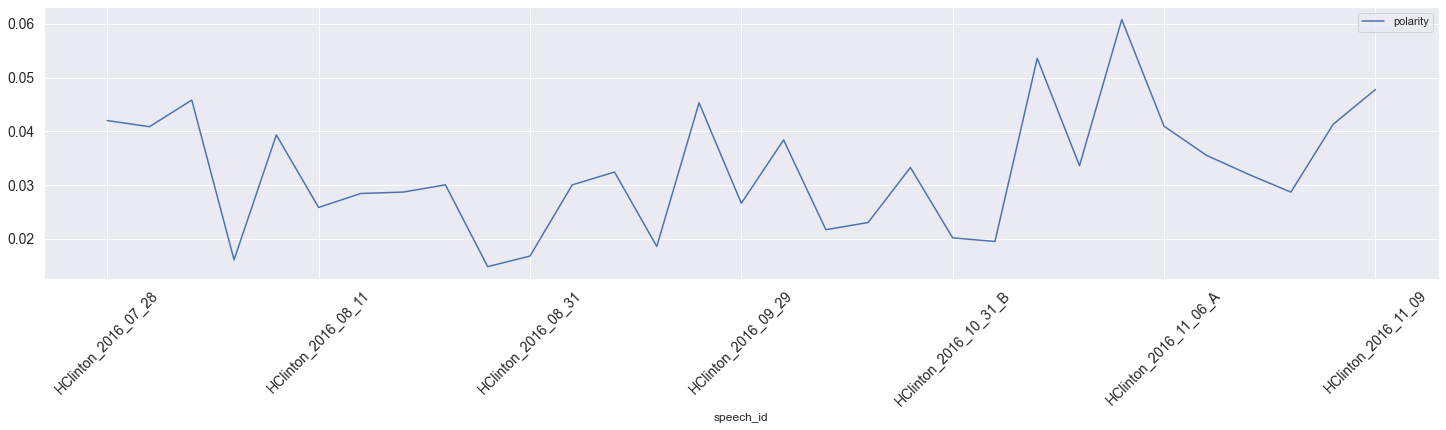

In [83]:
plot_sentiments(hclinton_chaps, ['polarity'])

## Explore Sentiment in Texts

In [84]:
trump

pos_tuple  pos  \
speech_id        para_num sent_num token_num                            
Trump_2016_07_22 0        0        0          ('<TRUMP:>', 'JJ')   JJ   
                                   1            ('Thank', 'NNP')  NNP   
                                   2              ('you', 'PRP')  PRP   
                                   3              ('very', 'RB')   RB   
                                   4             ('much.', 'VB')   VB   
...                                                          ...  ...   
Trump_2016_11_09 6        11       3                ('to', 'TO')   TO   
                                   4              ('Mike', 'VB')   VB   
                                   5           ('Pence.', 'NNP')  NNP   
                          12       0            ('Thank', 'NNP')  NNP   
                                   1              ('you.', 'NN')   NN   

                                             token_str term_str  anger  \
speech_id        para_num sent_num token_num                             
Trump_2016_07_22 0        0        0          <TRUMP:>    trump    0.0   
                                   1             Thank    thank    0.0   
                                   2               you      you    0.0   
                                   3              very     very    0.0   
                                   4             much.     much    0.0   
...                                                ...      ...    ...   
Trump_2016_11_09 6        11       3                to       to    0.0   
                                   4              Mike     mike    0.0   
                                   5            Pence.    pence    0.0   
                          12       0             Thank    thank    0.0   
                                   1              you.      you    0.0   

                                              anticipation  disgust  fear  \
speech_id        para_num sent_num token_num                                
Trump_2016_07_22 0        0        0                   0.0      0.0   0.0   
                                   1                   0.0      0.0   0.0   
                                   2                   0.0      0.0   0.0   
                                   3                   0.0      0.0   0.0   
                                   4                   0.0      0.0   0.0   
...                                                    ...      ...   ...   
Trump_2016_11_09 6        11       3                   0.0      0.0   0.0   
                                   4                   0.0      0.0   0.0   
                                   5                   0.0      0.0   0.0   
                          12       0                   0.0      0.0   0.0   
                                   1                   0.0      0.0   0.0   

                                              joy  negative  positive  \
speech_id        para_num sent_num token_num                            
Trump_2016_07_22 0        0        0          0.0       NaN       NaN   
                                   1          0.0       NaN       NaN   
                                   2          0.0       NaN       NaN   
                                   3          0.0       NaN       NaN   
                                   4          0.0       NaN       NaN   
...                                           ...       ...       ...   
Trump_2016_11_09 6        11       3          0.0       NaN       NaN   
                                   4          0.0       NaN       NaN   
                                   5          0.0       NaN       NaN   
                          12       0          0.0       NaN       NaN   
                                   1          0.0       NaN       NaN   

                                              sadness  surprise  trust  \
speech_id        para_num sent_num token_num                             
Trump_2016_07_22 0        0        0      

In [85]:
trump['html'] =  trump.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.term_str), 1)
hclinton['html'] =  hclinton.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.term_str), 1)

In [86]:
trump['html']

speech_id         para_num  sent_num  token_num
Trump_2016_07_22  0         0         0            <span class='sent0'>trump</span>
                                      1            <span class='sent0'>thank</span>
                                      2              <span class='sent0'>you</span>
                                      3             <span class='sent0'>very</span>
                                      4             <span class='sent0'>much</span>
                                                                 ...               
Trump_2016_11_09  6         11        3               <span class='sent0'>to</span>
                                      4             <span class='sent0'>mike</span>
                                      5            <span class='sent0'>pence</span>
                            12        0            <span class='sent0'>thank</span>
                                      1              <span class='sent0'>you</span>
Name: html, Length: 426970, 

In [87]:
trump['html'].sample(10)

speech_id           para_num  sent_num  token_num
Trump_2016_07_26    2         27        9            <span class='sent0'>handling</span>
Trump_2016_11_05_A  23        36        1                 <span class='sent0'>the</span>
Trump_2016_10_18    14        13        7                 <span class='sent0'>you</span>
Trump_2016_10_10_A  6         42        13              <span class='sent0'>years</span>
Trump_2016_10_06    0         7         15              <span class='sent0'>where</span>
Trump_2016_10_31    18        182       6              <span class='sent0'>bosnia</span>
Trump_2016_11_02_C  12        36        0                  <span class='sent0'>we</span>
Trump_2016_09_06_A  8         0         42                 <span class='sent0'>in</span>
Trump_2016_08_12_A  6         450       6                 <span class='sent0'>how</span>
Trump_2016_08_12_B  10        17        11              <span class='sent0'>early</span>
Name: html, dtype: object

In [88]:
#trump_sents = trump.groupby(CHAPS)[emo_cols].mean()
#hclinton_sents = hclinton.groupby(CHAPS)[emo_cols].mean()
#trump_sents['sent_str'] = trump.groupby(CHAPS).term_str.apply(lambda x: x.str.cat(sep=' '))
#trump_sents['html_str'] = trump.groupby(CHAPS).html.apply(lambda x: x.str.cat(sep=' '))
#hclinton_sents['sent_str'] = hclinton.groupby(CHAPS).term_str.apply(lambda x: x.str.cat(sep=' '))
#hclinton_sents['html_str'] = hclinton.groupby(CHAPS).html.apply(lambda x: x.str.cat(sep=' '))

In [89]:
trump_sents = trump.groupby(PARAS)[emo_cols].mean()
hclinton_sents = hclinton.groupby(PARAS)[emo_cols].mean()
trump_sents['sent_str'] = trump.groupby(PARAS).term_str.apply(lambda x: x.str.cat(sep=' '))
trump_sents['html_str'] = trump.groupby(PARAS).html.apply(lambda x: x.str.cat(sep=' '))
hclinton_sents['sent_str'] = hclinton.groupby(PARAS).term_str.apply(lambda x: x.str.cat(sep=' '))
hclinton_sents['html_str'] = hclinton.groupby(PARAS).html.apply(lambda x: x.str.cat(sep=' '))

In [90]:
trump_sents = trump.groupby(PARAS)[emo_cols].mean()
hclinton_sents = hclinton.groupby(PARAS)[emo_cols].mean()
trump_sents['sent_str'] = trump.groupby(PARAS).term_str.apply(lambda x: x.str.cat(sep=' '))
trump_sents['html_str'] = trump.groupby(PARAS).html.apply(lambda x: x.str.cat(sep=' '))
hclinton_sents['sent_str'] = hclinton.groupby(PARAS).term_str.apply(lambda x: x.str.cat(sep=' '))
hclinton_sents['html_str'] = hclinton.groupby(PARAS).html.apply(lambda x: x.str.cat(sep=' '))

In [91]:
#trump_sents = trump.groupby(CHAPS)[emo_cols].mean()
#hclinton_sents = hclinton.groupby(CHAPS)[emo_cols].mean()
#trump_sents['sent_str'] = trump.groupby(CHAPS).term_str.apply(lambda x: x.str.cat(sep=' '))
#trump_sents['html_str'] = trump.groupby(CHAPS).html.apply(lambda x: x.str.cat(sep=' '))
#hclinton_sents['sent_str'] = hclinton.groupby(CHAPS).term_str.apply(lambda x: x.str.cat(sep=' '))
#hclinton_sents['html_str'] = hclinton.groupby(CHAPS).html.apply(lambda x: x.str.cat(sep=' '))

In [92]:
#trump_sents = trump.groupby(SENTS)[emo_cols].mean()
#hclinton_sents = hclinton.groupby(SENTS)[emo_cols].mean()

In [93]:
#trump_sents['sent_str'] = trump.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
#trump_sents['html_str'] = trump.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [94]:
#hclinton_sents['sent_str'] = hclinton.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
#hclinton_sents['html_str'] = hclinton.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [95]:
def sample_sentences(df):
    rows = []
    for idx in df.sample(10).index:

        valence = round(df.loc[idx, emo], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))

In [96]:
sample_sentences(trump_sents)

Sentiment,ID,Sentence
-0.05,"(183, 0)",trump well they shouted nan nan you know what was interesting trump nan nan this is a sick sick deal
0.0,"(35, 7)",if the secretary of state can be bought or bribed or sold and by the way thats a far less expensive solution than other very foolish solutions ive heard thats gotta end very quickly
0.0299,"(11, 102)",finally we will have at our disposal additional revenues from unleashing american energy please stop winning hillary clinton systematically attacked and discredited the victims of bill clintons sexual harassment and assault she destroyed 30000 nan nan remember this nan nan 33000 e nan mails after receiving a congressional subpoena nan nan the key word being after nan nan and made 13 phones disappear some with a hammer
0.0,"(33, 37)",and i said to her youve been here for 30 years hillary
0.0122,"(0, 79)",applause i dont even know why laughter and we dont get it from hillary because theres no nan nan you know the bernie people had spirit then in august of 2004 very early in the conflict extremely early in the conflict right at the beginning i made a detailed statement in an interview to esquire magazine so right at the beginning hes been very nan nan i dont know if hes allowed support but he sounds like he supports me a lot
0.0,"(0, 240)",and you know in paris where they walked in nan nan and the same with san bernardino they walked in
0.0,"(4, 260)",so heres the story
-0.0476,"(58, 19)",its a rigged system against all of us i used to say i think someday hell be an anchor guess what
0.0213,"(0, 111)",applause one of the reporters was talking about nan nan one of the reporters nan nan how do you feel about building ships because you have a lot of ships youre building up here good ones right i ended with i would have been tougher on terrorism
0.0,"(78, 5)",and so as you sit here before them this morning before you depart what would be your final words to them as they go back to their respective parts of the country he didnt really say son you have to learn but hed be on the telephone negotiating with a plumber or an electrician or a sheet rocker and i would hear this and id be playing with blocks at his knee on the floor and id be listening and it was always so vivid


In [97]:
#sample_sentences(hclinton_sents)

## VADER

In [98]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [99]:
trump_vader_cols = trump_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
trump_vader = pd.concat([trump_sents, trump_vader_cols], axis=1)

In [100]:
trump_vader.head()

anger  anticipation   disgust      fear       joy  \
para_num sent_num                                                         
0        0         0.007417      0.018541  0.008653  0.017305  0.018541   
         1         0.010256      0.015385  0.003419  0.008547  0.034188   
         2         0.016920      0.011844  0.008460  0.013536  0.023689   
         3         0.006339      0.020602  0.004754  0.006339  0.038035   
         4         0.011338      0.020408  0.013605  0.011338  0.040816   

                    sadness  surprise     trust  polarity  \
para_num sent_num                                           
0        0         0.007417  0.009889  0.033375  0.018541   
         1         0.010256  0.022222  0.039316  0.032479   
         2         0.008460  0.011844  0.038917  0.035533   
         3         0.006339  0.020602  0.036450  0.034865   
         4         0.011338  0.024943  0.049887  0.043084   

                                                            sent_str  \
para_num sent_num                                                      
0        0         trump thank you very much pence with terrorist...   
         1         we had an amazing convention and that man is d...   
         2         that was one of the best another clinton presi...   
         3         i think it was one of the best ever remember r...   
         4         in terms in terms of enthusiasm in terms of i ...   

                                                            html_str    neg  \
para_num sent_num                                                             
0        0         <span class='sent0'>trump</span> <span class='...  0.051   
         1         <span class='sent0'>we</span> <span class='sen...  0.031   
         2         <span class='sent0'>that</span> <span class='s...  0.064   
         3         <span class='sent0'>i</span> <span class='sent...  0.058   
         4         <span class='sent0'>in</span> <span class='sen...  0.085   

                     neu    pos  compound  
para_num sent_num                          
0        0         0.769  0.180    0.9988  
         1         0.757  0.212    0.9991  
         2         0.760  0.176    0.9976  
         3         0.775  0.167    0.9976  
         4         0.744  0.172    0.9908

<AxesSubplot:xlabel='para_num,sent_num'>

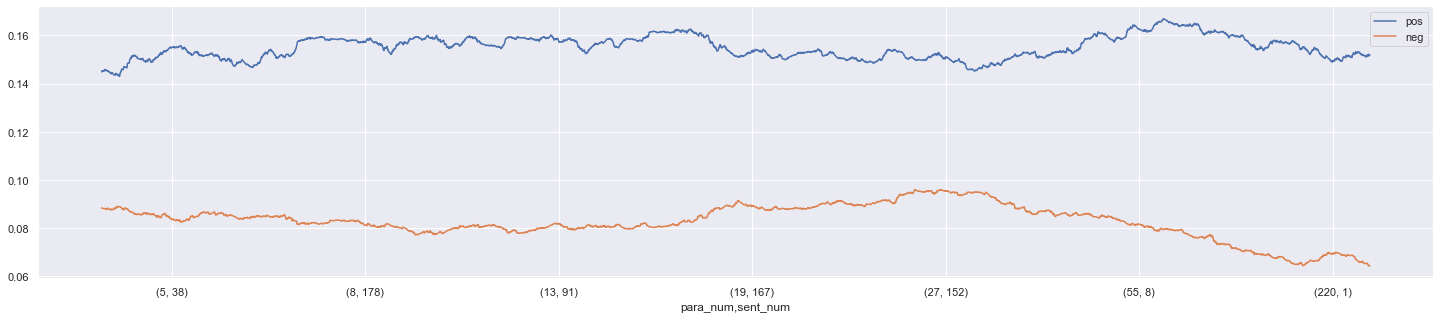

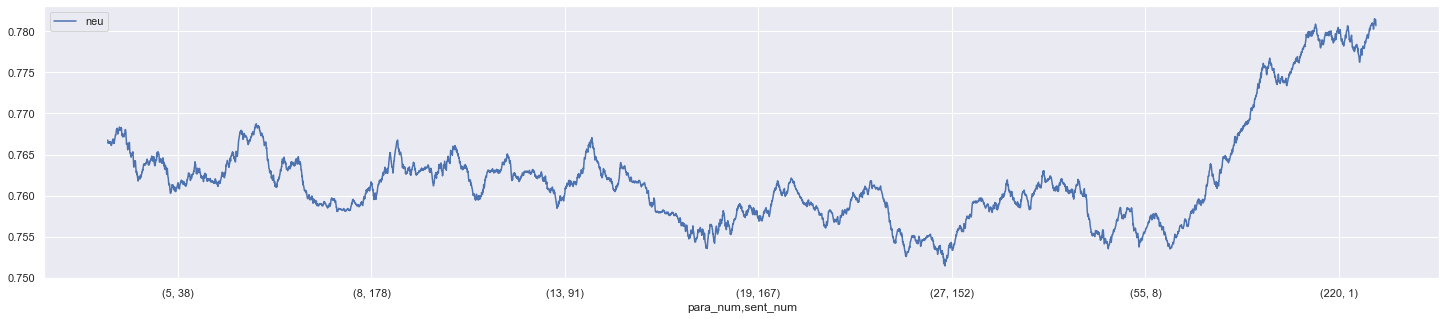

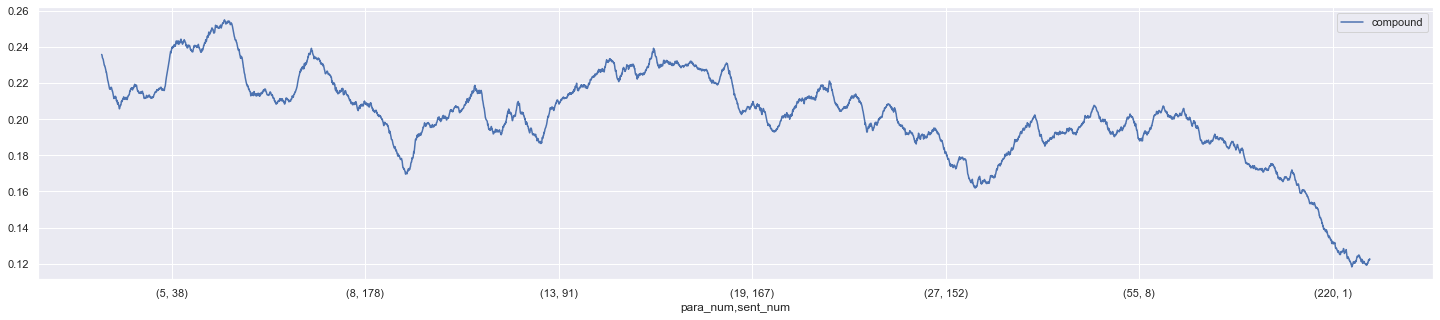

In [101]:
w = int(trump_vader.shape[0] / 5)
trump_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
trump_vader[['neu']].rolling(w).mean().plot(figsize=(25,5))
trump_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))

In [102]:
hclinton_vader_cols = hclinton_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
hclinton_vader = pd.concat([hclinton_sents, hclinton_vader_cols], axis=1)

<AxesSubplot:xlabel='para_num,sent_num'>

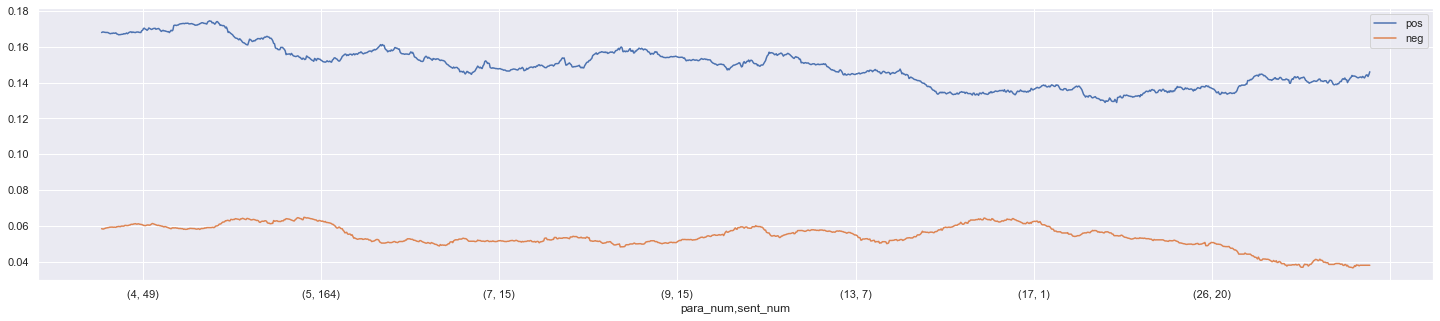

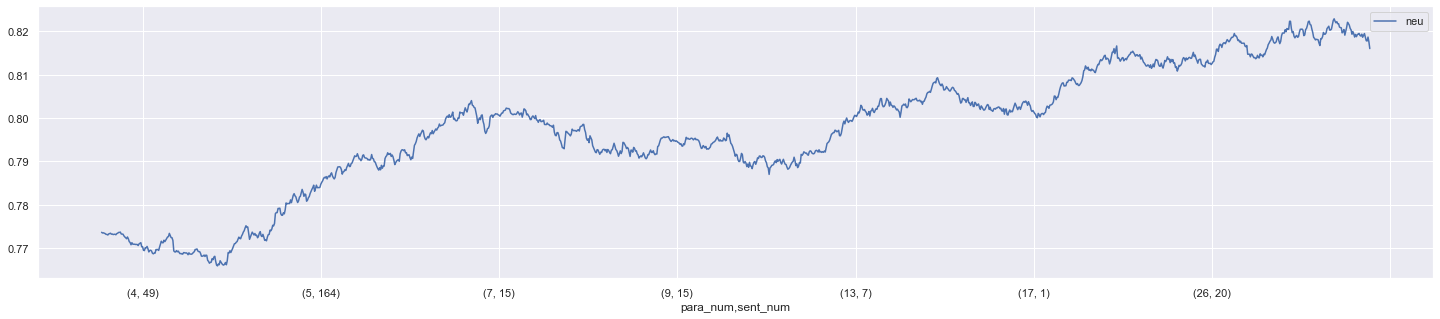

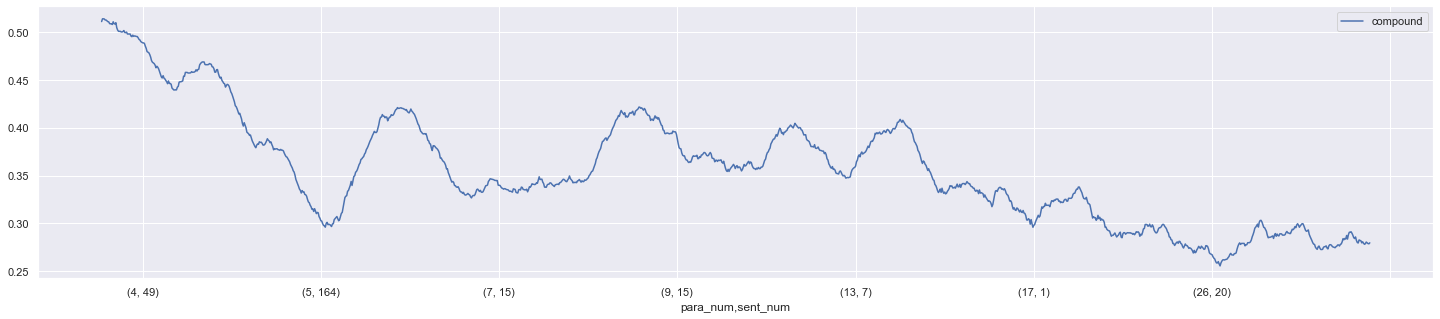

In [103]:
w = int(hclinton_vader.shape[0] / 5)
hclinton_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
hclinton_vader[['neu']].rolling(w).mean().plot(figsize=(25,5))
hclinton_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))